In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('SET - 1 -Silver prices.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/17/2023,23.042,11441.0,22.800,23.385,22.725
1,08/16/2023,22.856,10802.0,22.905,23.170,22.770
2,08/15/2023,22.656,60396.0,22.650,22.770,22.265
3,08/14/2023,22.708,51908.0,22.740,22.820,22.410
4,08/11/2023,22.743,48043.0,22.760,22.910,22.610


In [5]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2534,08/23/2013,23.781,20102.0,23.235,24.140,22.935
2535,08/22/2013,23.080,12238.0,22.920,23.365,22.500
2536,08/21/2013,23.009,7326.0,23.020,23.400,22.810
2537,08/20/2013,23.118,14280.0,23.200,23.350,22.320
2538,08/19/2013,23.215,8249.0,23.330,23.640,23.010


In [6]:
df.isnull().sum()

Date           0
Close/Last     0
Volume        63
Open           0
High           0
Low            0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [9]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000
mean,19.158506,56836.897819,19.169718,19.392533,18.926273
std,3.769752,31718.237093,3.782022,3.846267,3.691737
min,11.772000,1.000000,11.975000,12.330000,11.640000
25%,16.268000,38002.500000,16.265000,16.435000,16.103750
50%,17.818500,53604.000000,17.857500,18.020000,17.665000
75%,22.281250,71269.500000,22.350000,22.568750,21.948750
max,29.418000,347002.000000,29.235000,30.350000,28.300000


In [10]:
numeric_features = ['Open', 'High','Low','Volume']
df[numeric_features + ['Close/Last']].describe()

,Open,High,Low,Volume,Close/Last
count,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000
mean,19.169718,19.392533,18.926273,56836.897819,19.158506
std,3.782022,3.846267,3.691737,31718.237093,3.769752
min,11.975000,12.330000,11.640000,1.000000,11.772000
25%,16.265000,16.435000,16.103750,38002.500000,16.268000
50%,17.857500,18.020000,17.665000,53604.000000,17.818500
75%,22.350000,22.568750,21.948750,71269.500000,22.281250
max,29.235000,30.350000,28.300000,347002.000000,29.418000


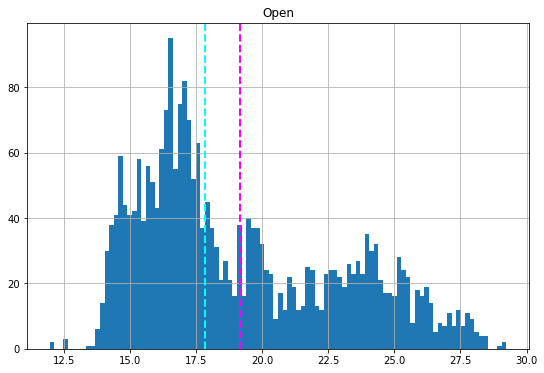

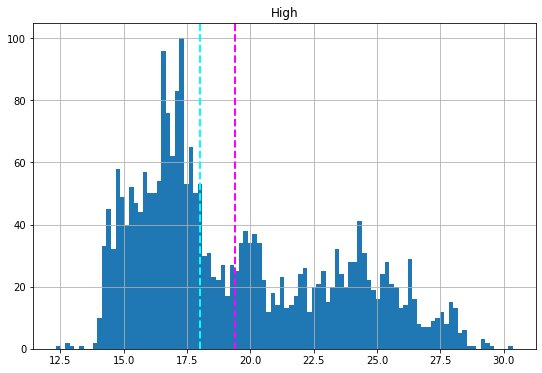

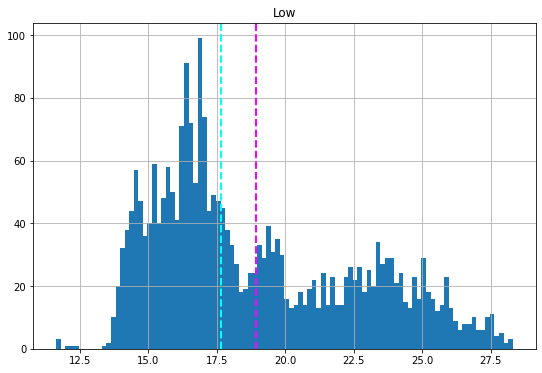

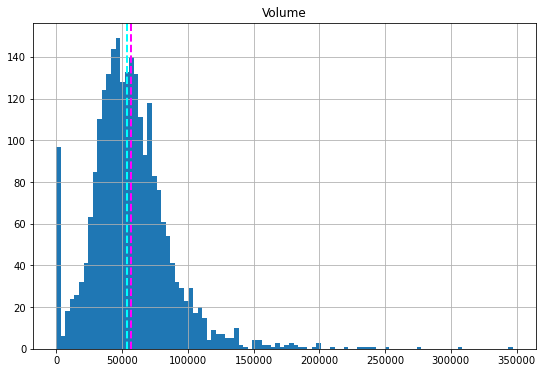

In [11]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

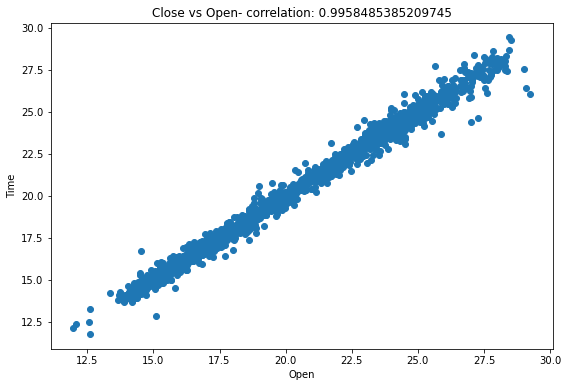

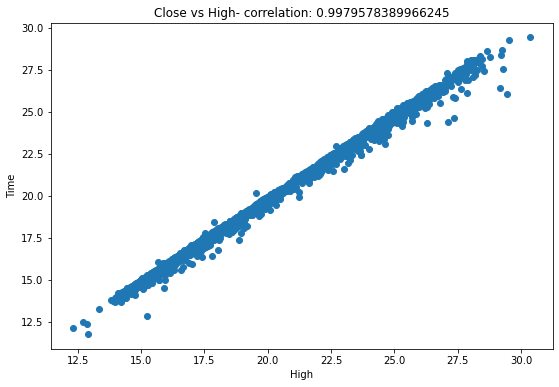

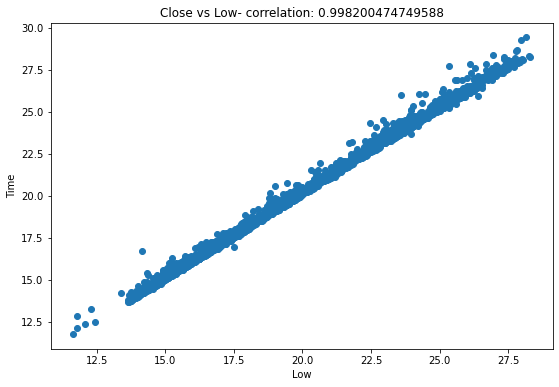

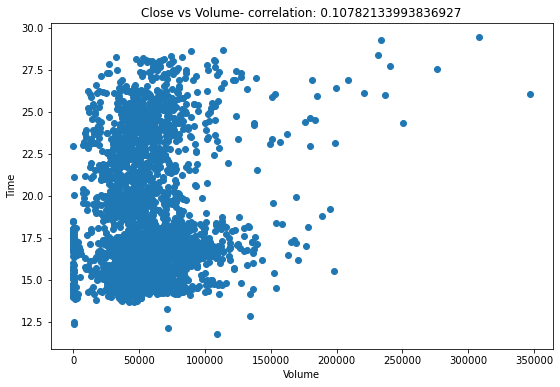

In [12]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close/Last']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Time')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
plt.show()

In [13]:
X, y = df[['Open','High','Low','Volume']].values, df['Close/Last'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[2.2800e+01 2.3385e+01 2.2725e+01 1.1441e+04]
 [2.2905e+01 2.3170e+01 2.2770e+01 1.0802e+04]
 [2.2650e+01 2.2770e+01 2.2265e+01 6.0396e+04]
 [2.2740e+01 2.2820e+01 2.2410e+01 5.1908e+04]
 [2.2760e+01 2.2910e+01 2.2610e+01 4.8043e+04]
 [2.2730e+01 2.3060e+01 2.2665e+01 7.1226e+04]
 [2.2820e+01 2.2990e+01 2.2680e+01 6.0561e+04]
 [2.3200e+01 2.3255e+01 2.2720e+01 7.3338e+04]
 [2.3720e+01 2.3775e+01 2.3145e+01 5.5345e+04]
 [2.3710e+01 2.3895e+01 2.3275e+01 5.6747e+04]]

Labels:
[23.042 22.856 22.656 22.708 22.743 22.821 22.731 22.807 23.232 23.716]


In [14]:
from sklearn.model_selection import train_test_split

# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1980 rows
Test Set: 496 rows


In [15]:
from sklearn.linear_model import LinearRegression


# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [19. 19. 17. 23. 23. 16. 15. 14. 16. 20.]
Actual labels   :  [19.368 18.974 16.906 23.135 23.36  16.251 15.372 14.505 16.431 19.946]


In [17]:
y_pred = model.predict(X_test)
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

Coefficients: 
 [-0.44471751  0.7489668   0.69593602 -0.00000008]
Mean squared error: 0.02
Variance score: 1.00


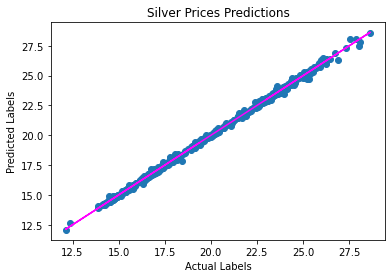

In [18]:
%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Silver Prices Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [19]:
Predicted_values = [19, 19, 17, 23, 23, 16, 15, 14, 16, 20]
Actual_values = [19.368, 18.974, 16.906, 23.135, 23.36,  16.251, 15.372, 14.505, 16.431, 19.946]

from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(Actual_values, Predicted_values))
# printing the mean squared error
print(mean_squared_error(Actual_values, Predicted_values))
# printing the mean squared error
print(mean_squared_error(y_test, y_pred))

0.25960000000000016
0.09378480000000011
0.020567665507357655


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.020567665507357655
RMSE: 0.14341431416479197
R2: 0.9984743931242002


In [21]:
import joblib

# Save the model as a pickle file
filename = './silver_prices_model.pkl'
joblib.dump(model, filename)

['./silver_prices_model.pkl']

In [22]:
# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,28.38,16.25,24.93],
                  [13.6,24.15,19.25,23.64]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
25.35
25.43


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "/content/SET - 1 -Silver prices.csv"
df = pd.read_csv(file_path)

# Drop missing values
df.dropna(inplace=True)

# Remove outliers in 'Volume' using IQR method
Q1 = df["Volume"].quantile(0.25)
Q3 = df["Volume"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Volume"] >= lower_bound) & (df["Volume"] <= upper_bound)]

# Define features (X) and target (y)
X = df[['Open', 'Volume']]
y = df['Close/Last']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Silver Prices")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/SET - 1 -Silver prices.csv'

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import joblib

# Load the trained model
model = joblib.load('./silver_prices_model.pkl')

# Load historical data
df = pd.read_csv("SET - 1 -Silver prices.csv")

# Generate future dates from 2025 to 2030
future_dates = pd.date_range(start="2025-01-01", end="2030-12-31", freq='D')

# Generate realistic Open, High, Low, and Volume for future dates
open_price = df['Open'].mean() * (1 + np.random.uniform(-0.02, 0.02, len(future_dates)))  # Small variations
high_price = open_price * 1.02  # Assume high is 2% above open
low_price = open_price * 0.98  # Assume low is 2% below open
volume = df['Volume'].mean() * (1 + np.random.uniform(-0.05, 0.05, len(future_dates)))  # Slight volume changes

# Create a DataFrame for future data
future_data = pd.DataFrame({
    'Date': future_dates,
    'Open': open_price,
    'High': high_price,
    'Low': low_price,
    'Volume': volume
})

# Predict closing prices for future data
future_data['Predicted_Close'] = model.predict(future_data[['Open', 'High', 'Low', 'Volume']])

# Mark data type (Actual vs. Predicted)
df['Type'] = 'Actual'  # Historical data
future_data['Type'] = 'Predicted'  # Future data

# Combine both datasets
combined_data = pd.concat([df, future_data], ignore_index=True)

# Save combined dataset for Power BI
combined_data.to_csv("silver_prices_combined.csv", index=False)

print("✅ Combined dataset (Historical + Predicted) saved as silver_prices_combined.csv")


✅ Combined dataset (Historical + Predicted) saved as silver_prices_combined.csv
